<a href="https://colab.research.google.com/github/Rigved19/NLP-Language-Translation/blob/main/NLP_Machine_Translation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Cleaning and Text-Preprocessing 
1. Adding additional tokens <sos> and <eos> for the German Sentences
2. Lowercasing
3. Removing Punctuations
4. Remove words with numbers


In [39]:
import re
import copy
import pickle
from matplotlib import pyplot as plt
from pickle import dump
from unicodedata import normalize
from numpy import array
import string 
import numpy as np
from numpy import asarray
from keras.preprocessing.sequence import pad_sequences
from numpy import zeros
 
#Cleaning and Processing Data (English and German sentences)
input_sentences = []
output_sentences = []
output_sentences_inputs = []
clean_input_sentences = []
clean_output_sentences = []
clean_output_sentences_inputs = []
 
NUM_SENTENCES =1000   #Taking the first 1000 sentences as our examples
count = 0
 
#Adding <eos> and <sos> for corresponding output sequences
#<sos> is "start of sentence" and <eos> is "end of sentence" for Output Sequences
for line in open(r'/content/deu.txt', encoding="utf-8"):
    count += 1
 
    if count > NUM_SENTENCES:
        break
 
    input_sentence, output , extra = line.rstrip().split('\t')
    
    output_sentence = output + ' <eos>'
    output_sentence_input = '<sos> ' + output
 
    input_sentences.append(input_sentence)
    output_sentences.append(output_sentence)
    output_sentences_inputs.append(output_sentence_input)
 

#Cleaning all the data,seperating and storing
def clean_pairs(lines):
    cleaned = list()
    # prepare translation table for removing punctuation
    table = str.maketrans('', '', string.punctuation)
    for line in lines:
        clean_pair = list()
        # tokenize on white space
        line = line.split()
        # convert to lowercase
        line = [word.lower() for word in line]
        # remove punctuation from each token
        line = [word.translate(table) for word in line]
        # remove tokens with numbers in them
        line = [word for word in line if word.isalpha()]
        # store as string
        clean_pair.append(' '.join(line))
        cleaned.append(clean_pair)
    return array(cleaned)
 
clean_input_sentences =  clean_pairs(input_sentences)
clean_output_sentences = clean_pairs(output_sentences)
clean_output_sentences_inputs = clean_pairs(output_sentences_inputs)
 
print("Printing processed English Sentences : "  , clean_input_sentences[959])
print("Printing corresponding processed Gemran Input Sentences : " ,  clean_output_sentences_inputs[959])
print("Printing Gemran Output Sentences" , clean_output_sentences[959])

#Counting no. of sentences(examples) in 
input_examples = len(clean_input_sentences)
output_examples = len(clean_output_sentences)

print("\nNumber if English Sentences" , input_examples)
print("Number if German Sentences" , output_examples)

Printing processed English Sentences :  ['keep them']
Printing corresponding processed Gemran Input Sentences :  ['sos behalt sie']
Printing Gemran Output Sentences ['behalt sie eos']

Number if English Sentences 1000
Number if German Sentences 1000


###Creating dictionaries for both languages
*   Word to Index
*   Index to word




In [40]:
#Creating dictionary for English Vob and German Vocab
#Contains a dictionary with unique words as keys with index numbers as values

def make_dict(sentences):
  set_input = set()              #Set() helps to count multiple same words only once
  dict_vocab = {}
  dict_index = {}

  for i in sentences:
    for j in i:
      words = j.split()
      set_input.update(words) 
  
  list_input = sorted(list(set_input))  # .sorted() - Sorting the list of Words in Ascending order
  vocab_size = len(list_input)
  

  for i in range(vocab_size):         #Forming Vocab Dictictionaries ( Words --> index)
    dict_vocab[list_input[i]] = i+1   # i+1 so that it can be read easier , because of 0 index

  for i in range(vocab_size):         #Forming Vocab Dictictionaries ( index --> Words)
    dict_index[i+1] = list_input[i]
 

  return(vocab_size,dict_vocab,dict_index)

#Forming English/German ( Vocab, Index, Size)
vocab_eng_size , vocab_eng , index_eng = make_dict(clean_input_sentences)
vocab_german_size, vocab_german , index_german = make_dict(clean_output_sentences)

#Adding the extra word "sos" in the german dictionary
vocab_german_size = vocab_german_size + 1
vocab_german["sos"] = vocab_german_size
index_german[vocab_german_size] = "sos"


print("\nEnlish Word-->Index :",vocab_eng)
print("\nEnlish Index-->Word :",index_eng)
print("\nGerman Word-->Index :",vocab_german)
print("\nGerman Index-->Word :",index_german)
print("\nEng Dictionary Size: ",vocab_eng_size)
print("German Dictionary Size:",vocab_german_size)
idx_sos = vocab_german["sos"]                      #Storing <sos> token number, used for sampling test cases
idx_eos = vocab_german["eos"]                      #Storing <eos> token number, used for sampling test cases



Enlish Word-->Index : {'a': 1, 'agree': 2, 'ahead': 3, 'aim': 4, 'all': 5, 'alone': 6, 'am': 7, 'angry': 8, 'answer': 9, 'approve': 10, 'ask': 11, 'ate': 12, 'attack': 13, 'awake': 14, 'away': 15, 'awesome': 16, 'awful': 17, 'back': 18, 'bad': 19, 'bald': 20, 'bark': 21, 'be': 22, 'beat': 23, 'bed': 24, 'begin': 25, 'birds': 26, 'bless': 27, 'blind': 28, 'bored': 29, 'brave': 30, 'brief': 31, 'broke': 32, 'burn': 33, 'burned': 34, 'bury': 35, 'busy': 36, 'buy': 37, 'by': 38, 'call': 39, 'calm': 40, 'came': 41, 'can': 42, 'care': 43, 'catch': 44, 'changed': 45, 'cheated': 46, 'cheer': 47, 'cheers': 48, 'chill': 49, 'clapped': 50, 'cold': 51, 'come': 52, 'cook': 53, 'cool': 54, 'coughed': 55, 'crazy': 56, 'cried': 57, 'cry': 58, 'cuff': 59, 'cured': 60, 'cursed': 61, 'cute': 62, 'dark': 63, 'dead': 64, 'deaf': 65, 'deep': 66, 'did': 67, 'die': 68, 'died': 69, 'dj': 70, 'do': 71, 'dogs': 72, 'dont': 73, 'down': 74, 'drive': 75, 'drop': 76, 'drove': 77, 'drunk': 78, 'dry': 79, 'duck': 80,

###Finding length of longest sentence in the train dataset for both languages
To be used as no. of time steps for the encoder-decoder model



In [41]:
#Finding maximum length of sentence in English and German sentences
def max_length(sentences):
  max_length = 1
  for i in sentences:
    for j in i:
      words = j.split()
      length = len(words)

    if length >= max_length:
      max_length = length
    else:
      pass

  return(max_length)

max_eng_length = max_length(clean_input_sentences)
max_german_length = max_length(clean_output_sentences)

print("Length of longest English sentence :", max_eng_length)
print("Length of longest German sentence :", max_german_length)


Length of longest English sentence : 3
Length of longest German sentence : 7


###Text-Preprocessing

*   Tokenization
*   Padding
 - Pre-Padding for Encoder Model
 *   Post-Padding for Decoder Model


In [42]:
#Tokenization and Padding

def tokenization(sentences,para):
  final_token = []
  for i in sentences:
    for j in i:
      words = j.split()
      token = []
      for x in words:
        if para ==0:
          index = vocab_eng[x]
        else:
          index = vocab_german[x]
        token.append(index)
    final_token.append(token)
  
  return(final_token)

token_eng = tokenization(clean_input_sentences,0)
token_german_inp = tokenization(clean_output_sentences_inputs,1)
token_german_out = tokenization(clean_output_sentences,1)

print("After tokenization English Sentences = ", token_eng[959])
print("After tokenization German Input Sentences = ", token_german_inp[959])
print("After tokenization German Output = ", token_german_out[959])


#Pre padding for Input sentences and Post padding for Output sentences
def padding(token,para):
  thislist = []
  if para == 0:
    length = max_eng_length
    for x in token:
      pad_arr = np.pad(x , (length-len(x),0) , 'constant', constant_values=0)
      arrlist = pad_arr.tolist()
      thislist.append(arrlist)
      
  else:
    length = max_german_length
    for x in token:
      pad_arr = np.pad(x , (0,length-len(x)) , 'constant', constant_values=0)   
      arrlist = pad_arr.tolist()
      thislist.append(arrlist)
      
  return(thislist)


padded_eng = padding(token_eng,0)
padded_german_inp = padding(token_german_inp,1)
padded_german_out = padding(token_german_out,1)

print("\nAfter Padding English Sentences = " , padded_eng[959])
print("After Padding Gemrman Input Sentences = " , padded_german_inp[959])
print("After Padding Gemrman Output Sentences = " , padded_german_out[959])
    


After tokenization English Sentences =  [176, 319]
After tokenization German Input Sentences =  [703, 37, 518]
After tokenization German Output =  [37, 518, 121]

After Padding English Sentences =  [0, 176, 319]
After Padding Gemrman Input Sentences =  [703, 37, 518, 0, 0, 0, 0]
After Padding Gemrman Output Sentences =  [37, 518, 121, 0, 0, 0, 0]


###Word Embedding
Creating word embedding matrix for english input sentences


In [43]:
#Word Embedding for Eng lang input layer

embeddings_dictionary = {}

glove_file = open(r'/content/glove.6B.50d.txt', encoding="utf8")

#Reading the required words from the emedding file and storing the required in code for further initialisation
for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

"""Creating a embedding matrix with row number is the integer value of the word and the column will represent corresponding 
embedding vector for the word
"""
embedding_matrix = np.zeros((vocab_eng_size+1, 50))   #Index 0 will have no values 
for word, index in vocab_eng.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

        
"""
Creating Decoder Input and Output layer (one hot) for german language with row number is the integer value of the word and the 
column will represent corresponding one hot vector for the word with 1 value at the index position 
corresponing to the integer value of the word
"""
german_matrix = np.zeros((vocab_german_size+1, vocab_german_size))
for word, index in vocab_german.items():
     german_matrix[index,index-1] = 1
     

In [44]:
# Labeling each important variable for reference

input_examples #No. of English Senteces
output_examples #No.of German Sentences = above
vocab_german_size #No. of German words
max_eng_length #Encoder Time Steps
max_german_length #Decoder Time Steps
embedding_matrix #Input Embedding Matrix
german_matrix #Output German Matrix

padded_eng = np.array(padded_eng) #X_enc_train
padded_german_inp = np.array(padded_german_inp) #X_dec_train
padded_german_out = np.array(padded_german_out) #Ytrain

###Forming Tensors for the Model

*   Input 3D Tensor of English sentences for Encoder Model
*   Input 3D Tensor of German sentencess for Decoder Model
*   Output 3D Tensor of Gemrman sentences for Decoder Model



In [45]:
#Forming Input 3D Tensors

#Converting the input sequence into embedding and reshaping a 3D tensor of shape(Embedding dim, Number of sentences, Timestep)
Xenc_train=np.zeros((50, input_examples , max_eng_length))
for m in range(input_examples):
    for t in range(max_eng_length):
        Xenc_train[:,m,t]=embedding_matrix[padded_eng[m,t]]

#Converting the output sequence into one-hot and reshaping a 3D tensor of shape(ger_vocab_size, Number of sentences, Timestep)
Xdec_train = np.zeros((vocab_german_size, input_examples , max_german_length))
for m in range(input_examples): 
  for t in range(max_german_length):
    Xdec_train[:,m,t] = german_matrix[padded_german_inp[m,t]]

Ydec_train = np.zeros((vocab_german_size, input_examples , max_german_length))
for m in range(input_examples): 
  for t in range(max_german_length):
    Ydec_train[:,m,t] = german_matrix[padded_german_out[m,t]]

print(Xenc_train[:,959,:])

[[ 0.          0.14816999  0.64642   ]
 [ 0.         -0.22174001 -0.55599999]
 [ 0.          0.60220999  0.47038001]
 [ 0.         -0.79488999 -0.82073998]
 [ 0.          0.33458     0.79512   ]
 [ 0.         -0.40401     0.28771001]
 [ 0.         -0.62263    -0.56426001]
 [ 0.          0.2534      0.1463    ]
 [ 0.          0.054533   -0.52420998]
 [ 0.         -0.032518    0.021607  ]
 [ 0.         -0.045699   -0.11266   ]
 [ 0.          0.44084999  0.31986001]
 [ 0.         -0.4429     -0.057542  ]
 [ 0.          0.28121999 -0.23375   ]
 [ 0.          0.36605999  0.63703001]
 [ 0.          0.78263003  0.3382    ]
 [ 0.          0.50840998  0.46489999]
 [ 0.         -0.36081001 -0.42398   ]
 [ 0.          0.38600001  0.091868  ]
 [ 0.         -1.02349997 -0.8804    ]
 [ 0.          0.10762     0.22077   ]
 [ 0.          0.11578     0.71270001]
 [ 0.          0.25240001  0.98196   ]
 [ 0.         -0.025313   -0.033819  ]
 [ 0.          0.026976    0.31553999]
 [ 0.         -1.76540005

###Encoder-Decoder Model
Following are the function being implemented :
*   Parameters Initialization
*   Encoder Forward Propogation
*   Decoder Forward Propogation
*   Loss - Cross Entropy Loss
*   Decoder Backward Propogation
*   Encoder Backward Propogation
*   Gradient Descent


In [46]:
class LSTM:
   

    def __init__(self, embed_enc, onehot_dec, eng_vocab, ger_vocab, epoch, lr, hid_dim, embed_size, timesteps_enc , timesteps_dec):
        self.embed_enc=embed_enc  #Embedded input
        self.onehot_dec=onehot_dec #Decoder OneHot Input
        self.epoch=epoch  #number of epoch
        self.lr=lr   #learning rate

        self.embed_size=embed_size   #(n_x)_encoder
        self.ger_vocab=ger_vocab     #(n_x)_decoder and n_y
        self.eng_vocab=eng_vocab
        self.length_enc = timesteps_enc   #Encoder Timesteps
        self.length_dec = timesteps_dec   #Decoder Timesteps
        self.hidden = hid_dim        #(n_a)
        
        #Parameter Initialization

        np.random.seed(1)
        #Encoder Paramters
        self.wf_enc = np.random.randn(hid_dim , hid_dim + embed_size)*0.01
        self.wi_enc = np.random.randn(hid_dim , hid_dim + embed_size)*0.01
        self.wo_enc = np.random.randn(hid_dim , hid_dim + embed_size)*0.01
        self.wc_enc = np.random.randn(hid_dim , hid_dim + embed_size)*0.01

        self.bf_enc = np.zeros((hid_dim , 1))
        self.bi_enc = np.zeros((hid_dim , 1))
        self.bo_enc = np.zeros((hid_dim , 1))
        self.bc_enc = np.zeros((hid_dim , 1))

        #Decoder Paramters
        self.wf_dec = np.random.randn(hid_dim , hid_dim + ger_vocab)*0.01
        self.wi_dec = np.random.randn(hid_dim , hid_dim + ger_vocab)*0.01
        self.wo_dec = np.random.randn(hid_dim , hid_dim + ger_vocab)*0.01
        self.wc_dec = np.random.randn(hid_dim , hid_dim + ger_vocab)*0.01
        self.bf_dec = np.zeros((hid_dim , 1))
        self.bi_dec = np.zeros((hid_dim , 1))
        self.bo_dec = np.zeros((hid_dim , 1))
        self.bc_dec = np.zeros((hid_dim , 1))

        self.wy_dec = np.random.randn(ger_vocab , hid_dim )*0.01
        self.by_dec = np.zeros((ger_vocab , 1))

        #Encoder Gradients 
        self.dwf_enc = np.zeros_like(self.wf_enc)
        self.dwi_enc = np.zeros_like(self.wi_enc)
        self.dwo_enc = np.zeros_like(self.wo_enc)
        self.dwc_enc = np.zeros_like(self.wc_enc)
        
        self.dbf_enc = np.zeros_like(self.bf_enc)
        self.dbi_enc = np.zeros_like(self.bi_enc)
        self.dbo_enc = np.zeros_like(self.bo_enc)
        self.dbc_enc = np.zeros_like(self.bc_enc)
     
        #Decoder Gradients
        self.dwf_dec = np.zeros_like(self.wf_dec)
        self.dwi_dec = np.zeros_like(self.wi_dec)
        self.dwo_dec = np.zeros_like(self.wo_dec)
        self.dwc_dec = np.zeros_like(self.wc_dec)

        self.dbf_dec = np.zeros_like(self.bf_dec)
        self.dbi_dec = np.zeros_like(self.bi_dec)
        self.dbo_dec = np.zeros_like(self.bo_dec)
        self.dbc_dec = np.zeros_like(self.bc_dec)

        self.dwy_dec = np.zeros_like(self.wy_dec)
        self.dby_dec = np.zeros_like(self.by_dec)

        self.daa_dec=np.zeros((hid_dim, embed_enc.shape[1]))   ##
        self.daa_enc=np.zeros_like(self.daa_dec)              ##
        self.dcc_dec=np.zeros((hid_dim, embed_enc.shape[1]))   ##
        self.dcc_enc=np.zeros_like(self.dcc_dec)               ##
    

    def encoder_forward(self):

      def sigmoid(x):
        return 1 / (1 + np.exp(-x))

      #Forward prop in Encoder
      enc_hidden={}
      enc_memory = {}
      enc_ft = {}
      enc_it = {}
      enc_ot = {}
      enc_cct = {}

      a_next = np.zeros((self.wf_enc.shape[0], self.embed_enc.shape[1]))
      c_next = np.zeros((self.wf_enc.shape[0], self.embed_enc.shape[1]))
      enc_hidden[-1] = a_next
      enc_memory[-1] = c_next

      for t in range(self.length_enc):

        xt = self.embed_enc[:,:,t]
        concat = np.concatenate((a_next , xt))
        ft = sigmoid( self.wf_enc @ concat + self.bf_enc )
        it = sigmoid( self.wi_enc @ concat + self.bi_enc )
        ot = sigmoid( self.wo_enc @ concat + self.bo_enc)
        cct = np.tanh(self.wc_enc @ concat + self.bc_enc )

        enc_ft[t] = ft
        enc_it[t] = it 
        enc_ot[t] = ot
        enc_cct[t] = cct

        c_next = ((ft*c_next) + (it*cct))
        a_next = ot*(np.tanh(c_next))

        enc_hidden[t] = a_next
        enc_memory[t] = c_next


      return enc_hidden , enc_memory ,  enc_ft, enc_it, enc_ot, enc_cct

    def decoder_forward(self, enc_hidden, enc_memory):

        def sigmoid(x):
          return 1 / (1 + np.exp(-x))

        def softmax(x):
          e_x = np.exp(x - np.max(x))
          return e_x / e_x.sum(axis=0)


        #Forward prop in Decoder
        #dec_output = []
        #dec_input = []
        dec_hidden = {}
        dec_memory = {}
        dec_output = {}
        dec_ft = {}
        dec_it = {}
        dec_ot = {}
        dec_cct = {}
        
        a_next = enc_hidden
        c_next = enc_memory
        dec_hidden[-1] = enc_hidden
        dec_memory[-1] = enc_memory

        for t in range(self.length_dec):

          xt = self.onehot_dec[:,:,t]
          concat = np.concatenate((a_next , xt))
          ft = sigmoid(self.wf_dec @ concat + self.bf_dec )
          it = sigmoid(self.wi_dec @ concat + self.bi_dec )
          ot = sigmoid(self.wo_dec @ concat + self.bo_dec )
          cct = np.tanh(self.wc_dec @ concat + self.bc_dec )
          dec_ft[t] = ft
          dec_it[t] = it 
          dec_ot[t] = ot
          dec_cct[t] = cct

          c_next = ((ft*c_next) + (it*cct))
          a_next = ot*(np.tanh(c_next))

          y_pred = softmax( self.wy_dec @ a_next + self.by_dec )

          dec_hidden[t] = a_next
          dec_memory[t] = c_next
          dec_output[t] = y_pred


        return dec_hidden , dec_memory , dec_output, dec_ft, dec_it, dec_ot, dec_cct


    def loss(self, pred, orig):                                                   
        #compute loss
        loss=0
        for t in range(orig.shape[2]):
            yt_pred = pred[t]              #Since pred is dictionary with each key being a timestep have value of y pred - array(n_y , m)
            for m in range(orig.shape[1]):
              loss+= -np.sum((orig[:,m,t]*np.log(yt_pred[:,m])))


        return loss/orig.shape[1]

    def decoder_backward(self, dec_out, dec_hidden, dec_memory, orig, dec_ft, dec_it, dec_ot, dec_cct):
        #Backpropagation through time

        for t in reversed(range(self.length_dec)): 
            ft = dec_ft[t]
            it = dec_it[t] 
            ot = dec_ot[t]
            cct = dec_cct[t]
            xt = self.onehot_dec[:,:,t]
            c_next = dec_memory[t]
            c_prev = dec_memory[t-1]
            a_next = dec_hidden[t]
            a_prev = dec_hidden[t-1]
            n_a = self.hidden
   
            dy = np.copy(dec_out[t])                          #Backpropogation through Softmax
            Y = orig[:,:,t]
            for m in range(orig.shape[1]):
                dy[:,m] -= Y[:,m]

            self.dwy_dec += np.dot(dy, dec_hidden[t].T)       #Backpropogation through DenseLayer
            self.dby_dec += np.sum(dy, axis=1, keepdims=True)

            da = np.dot(self.wy_dec.T, dy) + self.daa_dec     #Backprop addidtion from DenseLayer and Reccurentlayer
            dot = da*np.tanh(c_next)*ot*(1 - ot)
            dcct = (self.dcc_dec*it + da*ot*(1- (np.tanh(c_next)**2))*it)*(1-cct**2)
            dit = (self.dcc_dec*cct + da*ot*(1- (np.tanh(c_next)**2))*cct)*it*(1 - it)
            dft = (self.dcc_dec*c_prev + da*ot*(1- (np.tanh(c_next)**2))*c_prev)*ft*(1 - ft)

            self.dwf_dec += dft@(np.concatenate((a_prev , xt))).T
            self.dwi_dec += dit@(np.concatenate((a_prev , xt))).T
            self.dwc_dec += dcct@(np.concatenate((a_prev , xt))).T
            self.dwo_dec += dot@(np.concatenate((a_prev , xt))).T
            self.dbf_dec += np.sum(dft , axis = 1 , keepdims = True)
            self.dbi_dec += np.sum(dit , axis = 1 , keepdims = True)
            self.dbc_dec += np.sum(dcct , axis = 1 , keepdims = True)
            self.dbo_dec += np.sum(dot , axis = 1 , keepdims = True)

            self.daa_dec = self.wf_dec[:,:n_a].T@dft + self.wi_dec[:,:n_a].T@dit + self.wc_dec[:,:n_a].T@dcct + self.wo_dec[:,:n_a].T@dot
            self.dcc_dec = self.dcc_dec*ft + da*ot*(1-(np.tanh(c_next)**2))*ft
        pass

    def encoder_backward(self, enc_hidden, enc_memory, enc_ft, enc_it, enc_ot, enc_cct):
        #Backpropagation through time
        self.daa_enc = self.daa_dec  #Passing Decoder to Encoder (Hidden State)
        self.dcc_enc = self.dcc_dec  #Passing Decoder to Encoder (Cell Memory)
        for t in reversed(range(self.length_enc)): 
            ft = enc_ft[t]
            it = enc_it[t] 
            ot = enc_ot[t]
            cct = enc_cct[t]
            xt = self.embed_enc[:,:,t]
            c_next = enc_memory[t]
            c_prev = enc_memory[t-1]
            a_next = enc_hidden[t]
            a_prev = enc_hidden[t-1]
            n_a = self.hidden
   
            
            da = self.daa_dec                
            dc = self.dcc_dec
            dot = da*np.tanh(c_next)*ot*(1 - ot)
            dcct = (dc*it + da*ot*(1- (np.tanh(c_next)**2))*it)*(1-cct**2)
            dit = (dc*cct + da*ot*(1- (np.tanh(c_next)**2))*cct)*it*(1 - it)
            dft = (dc*c_prev + da*ot*(1- (np.tanh(c_next)**2))*c_prev)*ft*(1 - ft)

            self.dwf_enc += dft@(np.concatenate((a_prev , xt))).T
            self.dwi_enc += dit@(np.concatenate((a_prev , xt))).T
            self.dwc_enc += dcct@(np.concatenate((a_prev , xt))).T
            self.dwo_enc += dot@(np.concatenate((a_prev , xt))).T
            self.dbf_enc += np.sum(dft , axis = 1 , keepdims = True)
            self.dbi_enc += np.sum(dit , axis = 1 , keepdims = True)
            self.dbc_enc += np.sum(dcct , axis = 1 , keepdims = True)
            self.dbo_enc += np.sum(dot , axis = 1 , keepdims = True)

            self.daa_enc = self.wf_enc[:,:n_a].T@dft + self.wi_enc[:,:n_a].T@dit + self.wc_enc[:,:n_a].T@dcct + self.wo_enc[:,:n_a].T@dot
            self.dcc_enc = dc*ft + da*ot*(1-(np.tanh(c_next)**2))*ft
        pass

    def update_params(self):

        for d in [self.dwf_dec, self.dwi_dec, self.dwo_dec, self.dwc_dec, self.dwy_dec, self.dbf_dec, self.dbi_dec, self.dbo_dec, self.dbc_dec, self.dby_dec, self.dwf_enc, self.dwi_enc, self.dwo_enc, self.dwc_enc, self.dbf_enc, self.dbi_enc, self.dbo_enc, self.dbc_enc ]:
            np.clip(d, -1, 1, out=d)                  #Gradient clipping to avoid exploding gradients
        
        #Updating Decoder Parameters
        self.wf_dec -= self.lr*self.dwf_dec
        self.wi_dec -= self.lr*self.dwi_dec
        self.wo_dec -= self.lr*self.dwo_dec
        self.wc_dec -= self.lr*self.dwc_dec
        self.wy_dec -= self.lr*self.dwy_dec

        self.bf_dec -= self.lr*self.dbf_dec
        self.bi_dec -= self.lr*self.dbi_dec
        self.bo_dec -= self.lr*self.dbo_dec
        self.bc_dec -= self.lr*self.dbc_dec
        self.by_dec -= self.lr*self.dby_dec


        #Updating Encoder Parameter
        self.wf_enc -= self.lr*self.dwf_enc
        self.wi_enc -= self.lr*self.dwi_enc
        self.wo_enc -= self.lr*self.dwo_enc
        self.wc_enc -= self.lr*self.dwc_enc
      
        self.bf_enc -= self.lr*self.dbf_enc
        self.bi_enc -= self.lr*self.dbi_enc
        self.bo_enc -= self.lr*self.dbo_enc
        self.bc_enc -= self.lr*self.dbc_enc
    

    def saveweight(model):
    #save the weights 
      params= model
      with open('weightRNN.dat','wb') as f:
          pickle.dump(params,f)
      print('weights saved successfully')
      pass

    def load_weights(model):
      with open('weightRNN.dat','rb') as f:
          weights = pickle.load(f)
      return weights

    def fit(X, Y, model):
    #Training the model
      costs = []
      for epoch in range(model.epoch):
          #Encoder Hidden State is captured after running Encoder Model
          enc_hidden, enc_memory, enc_ft, enc_it, enc_ot, enc_cct = model.encoder_forward() 
          #Last Encoder hidden state and Memory cell is passed as context vector
          dec_hidden, dec_memory, dec_output, dec_ft, dec_it, dec_ot, dec_cct = model.decoder_forward(enc_hidden[model.length_enc-1], enc_memory[model.length_enc-1] ) 
          #Compute Loss
          loss = model.loss(dec_output, Y)   
          #Print Loss
          if (epoch%5 ==0):
            costs.append(loss)
            print('loss: ', loss)
          #Backpropagation through time     
          model.decoder_backward(dec_output, dec_hidden, dec_memory, Y , dec_ft, dec_it, dec_ot, dec_cct)  

          model.encoder_backward(enc_hidden , enc_memory, enc_ft, enc_it, enc_ot, enc_cct)
          #Gradient Descent = updation of parameters
          model.update_params()

      #Plot the cost  
      plt.plot(np.squeeze(costs))
      plt.ylabel('Cost')
      plt.xlabel('Iterations (per 5)')
      plt.title("Trainingloss")
      plt.show()
      #Save Weights After Training
      model.saveweight()
      pass

    #Sampling Function to Predict Traanslation   
    def decoder_sampling (self, enc_hidden, enc_memory, idx_sos, idx_eos ) :
        
        def sigmoid(x):
          return 1 / (1 + np.exp(-x))

        def softmax(x):
          e_x = np.exp(x - np.max(x))
          return e_x / e_x.sum(axis=0)

        #Forward prop in Decoder
        dec_input = {}
        dec_hidden = {}
        dec_memory = {}

        y_pred = {}
        dec_output = {}

        indices = []
        
        a_next = enc_hidden
        c_next = enc_memory
        dec_hidden[-1] = enc_hidden
        dec_memory[-1] = enc_memory
        xt = np.zeros((self.ger_vocab , 1))      #Setting intial Input as <sos> token vector
        xt[idx_sos-1,0] = 1
        dec_input[-1] = xt

        idx = -1                                 #Initialize Index value

        t=0                                      #Counter

        while (idx+1 != idx_eos and t != 8) :    #Sample Until <eos> is reached or 8 words are sampled
          concat = np.concatenate((a_next , xt))
          ft = sigmoid(self.wf_dec @ concat + self.bf_dec )
          it = sigmoid(self.wi_dec @ concat + self.bi_dec )
          ot = sigmoid(self.wo_dec @ concat + self.bo_dec )
          cct = np.tanh(self.wc_dec @ concat + self.bc_dec )

          c_next = ((ft*c_next) + (it*cct))
          a_next = ot*(np.tanh(c_next))

          y_pred = softmax(self.wy_dec @a_next + self.by_dec)

          output = np.zeros((self.ger_vocab , 1)) 
          np.random.seed(t)
          idx = np.random.choice(list(range(self.ger_vocab)), p=y_pred[:,0].ravel())

          indices.append(idx+1)
          output[idx,0] = 1
          xt = output
          dec_input[t] = xt
          dec_output[t] = output

          t += 1

        return indices                            #Return Output Indices

    def predict(idx_sos, idx_eos, embed , eng_length, dummy):

      model = dummy.load_weights()  #load the weights

      model.embed_enc = embed
      model.length_enc = eng_length
      enc_hidden, enc_memory, enc_ft, enc_it, enc_ot, enc_cct = model.encoder_forward()

      indices = model.decoder_sampling(enc_hidden[model.length_enc-1], enc_memory[model.length_enc-1], idx_sos, idx_eos)

      return indices      



loss:  23.763060933055403
loss:  23.750424696283403
loss:  23.73620503467814
loss:  23.718966975954153
loss:  23.696909539744915
loss:  23.668531724502817
loss:  23.632097052103205
loss:  23.585437726498082
loss:  23.525705171141936
loss:  23.44942622020901
loss:  23.35246208008086
loss:  23.22996602868623
loss:  23.076503553000492
loss:  22.8866270389977
loss:  22.655622006270494
loss:  22.38138482570971
loss:  22.065360524575013
loss:  21.713553833878617
loss:  21.33594639405843
loss:  20.943727797262675
loss:  20.548421695383382
loss:  20.161116322199323
loss:  19.7901169639208
loss:  19.446674260531356
loss:  19.132827796102195
loss:  18.839616459842087
loss:  18.565488298192765
loss:  18.304106770106245
loss:  18.063386322296473
loss:  17.83565010343653
loss:  17.62721041409125
loss:  17.433688511653493
loss:  17.249523145885746
loss:  17.07470309236455
loss:  16.910128978747416
loss:  16.757086507921336
loss:  16.616975991165553
loss:  16.491145513629757
loss:  16.42477176796495


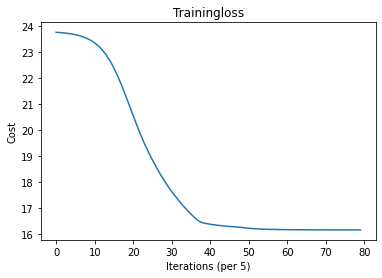

weights saved successfully


In [47]:
r = LSTM(Xenc_train, Xdec_train, vocab_eng_size, vocab_german_size, 400 , 0.0005 , 32, 50, max_eng_length , max_german_length)

LSTM.fit(Xenc_train, Ydec_train, r)
